In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from multiprocess import Pool

import numpy as np

In [2]:
sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from data_manager import *
from metadata import *

Setting environment for Gordon


No vtk


In [158]:
# img = cv2.imread('/home/yuncong/csd395/LeavesTexture/hedge_9103205.JPG')[250:1750]
img = cv2.imread('/home/yuncong/csd395/LeavesTexture/yoavhouse.jpg')[450:1900]

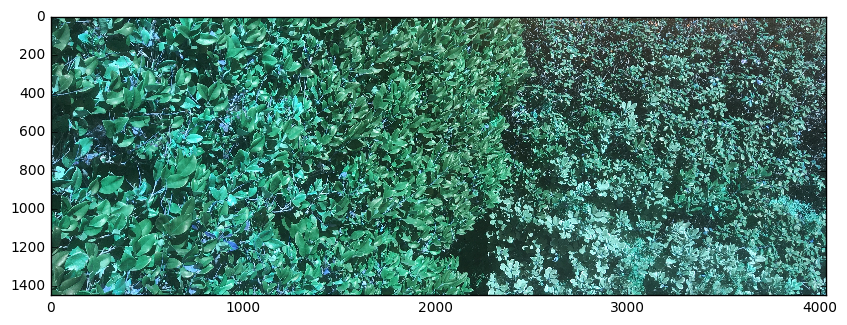

In [159]:
plt.figure(figsize=(10,10));
plt.imshow(img);
plt.show();

In [160]:
import numpy as np
from skimage.io import imsave
from skimage.util import img_as_ubyte
from skimage.feature import canny
from skimage.color import rgb2hsv, rgb2lab
from skimage.filters import threshold_otsu

In [161]:
img_hsv = rgb2hsv(img)

In [39]:
# thresh = threshold_otsu(img_hsv[..., 1])
# print thresh

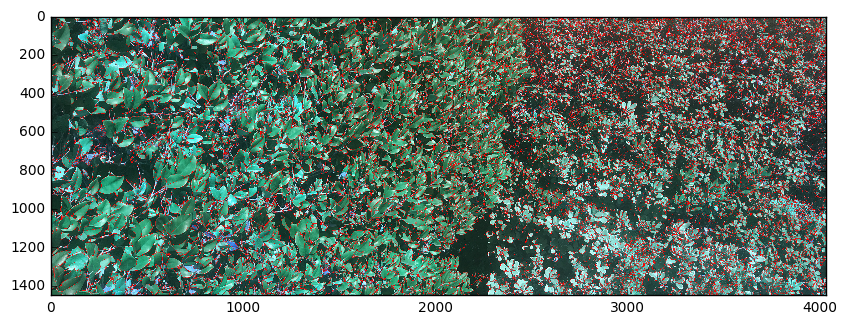

In [162]:
edge_img_val = canny(img_hsv[..., 2], low_threshold=.3, high_threshold=.6)

plt.figure(figsize=(10,10));

viz = img.copy()
viz[edge_img_val] = (255,0,0)
plt.imshow(viz);

In [163]:
edge_ys, edge_xs = np.where(edge_img_val)
points = np.c_[edge_xs, edge_ys]
print points.shape[0], 'edge pixels'

706119 edge pixels


In [91]:
from scipy.spatial import KDTree
from sklearn import linear_model

In [92]:
tree = KDTree(points)
nns = tree.query_ball_point(points, 5)

KeyboardInterrupt: 

In [67]:
vs = np.empty((len(points),2))

for cp, nbrs in enumerate(nns):
    nbr_points = points[nbrs]
    X = np.c_[nbr_points[:, 0] + np.random.random((len(nbrs),)), np.ones((len(nbrs),))]
    Y = nbr_points[:, 1]
    vs[cp] = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))

In [73]:
np.rad2deg(np.arctan(vs[:,0]))

array([ -4.83702391e+01,  -4.37242957e+01,  -1.28455843e+01, ...,
         4.61189762e+00,  -4.73103651e-02,  -4.65194243e+00])

In [79]:
from skimage.measure import label

In [164]:
labeled_edgemap, ncc = label(edge_img_val, return_num=True, connectivity=2)
print ncc, 'connected edge segments.'

12270 connected edge segments.


In [165]:
viz = img.copy()
for i in range(1, ncc+1):
    viz[labeled_edgemap == i] = np.random.randint(0, 255, (3,))

KeyboardInterrupt: 

In [95]:
display_image(viz)

/oasis/projects/nsf/csd395/yuncong/Brain/cells/tmp.jpg

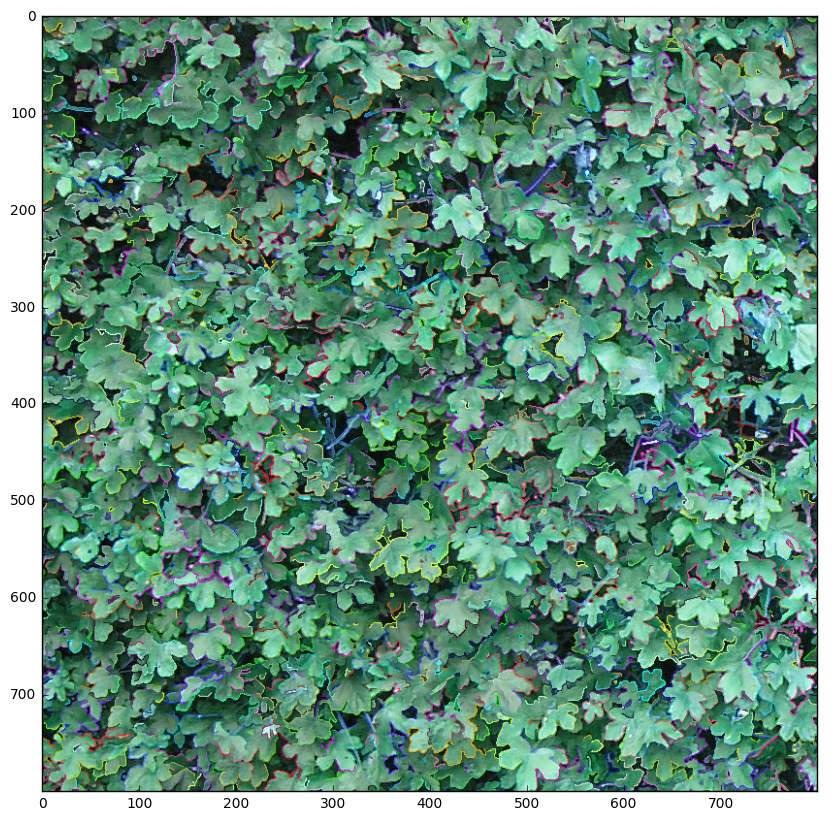

In [82]:
plt.figure(figsize=(10,10));
plt.imshow(viz);

In [188]:
viz_bg = np.zeros_like(img, np.uint8)
for i in range(1, ncc+1):
    viz_bg[labeled_edgemap == i] = np.random.randint(0, 255, (3,))

KeyboardInterrupt: 

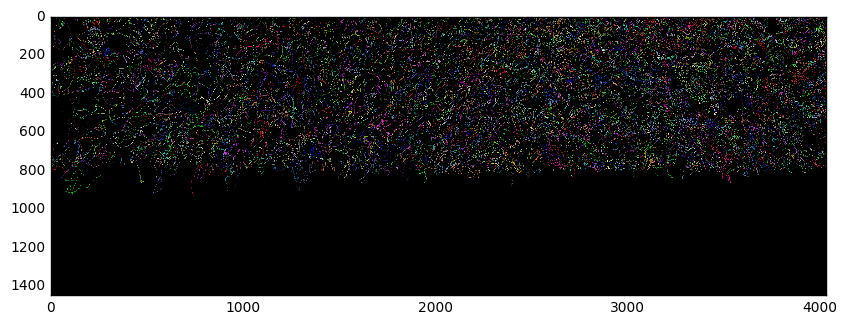

In [189]:
plt.figure(figsize=(10,10));
plt.imshow(viz_bg);

In [190]:
display_image(viz_bg, filename='tmp.png')

/oasis/projects/nsf/csd395/yuncong/Brain/cells/tmp.png

In [176]:
conn_comps = regionprops(labeled_edgemap)

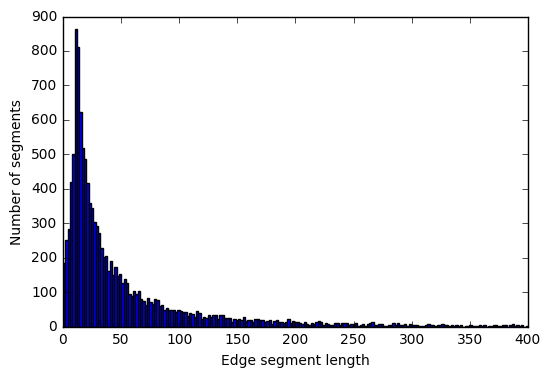

In [183]:
edge_segment_lengths = [np.count_nonzero(cc.image) for cc in conn_comps]

# plt.hist(edge_segment_lengths, bins=100);
plt.hist(edge_segment_lengths, bins=np.linspace(0,400,200));
plt.xlabel('Edge segment length');
plt.ylabel('Number of segments');

In [185]:
# long_segment_indices = np.where(np.array(edge_segment_lengths) > 200)[0]
long_segment_indices = np.where(np.abs(np.array(edge_segment_lengths) - 50) < 10)[0]

In [186]:
# indices = np.random.choice(np.arange(0, len(conn_comps)), size=100, replace=False)
indices = np.random.choice(long_segment_indices, size=100, replace=False)

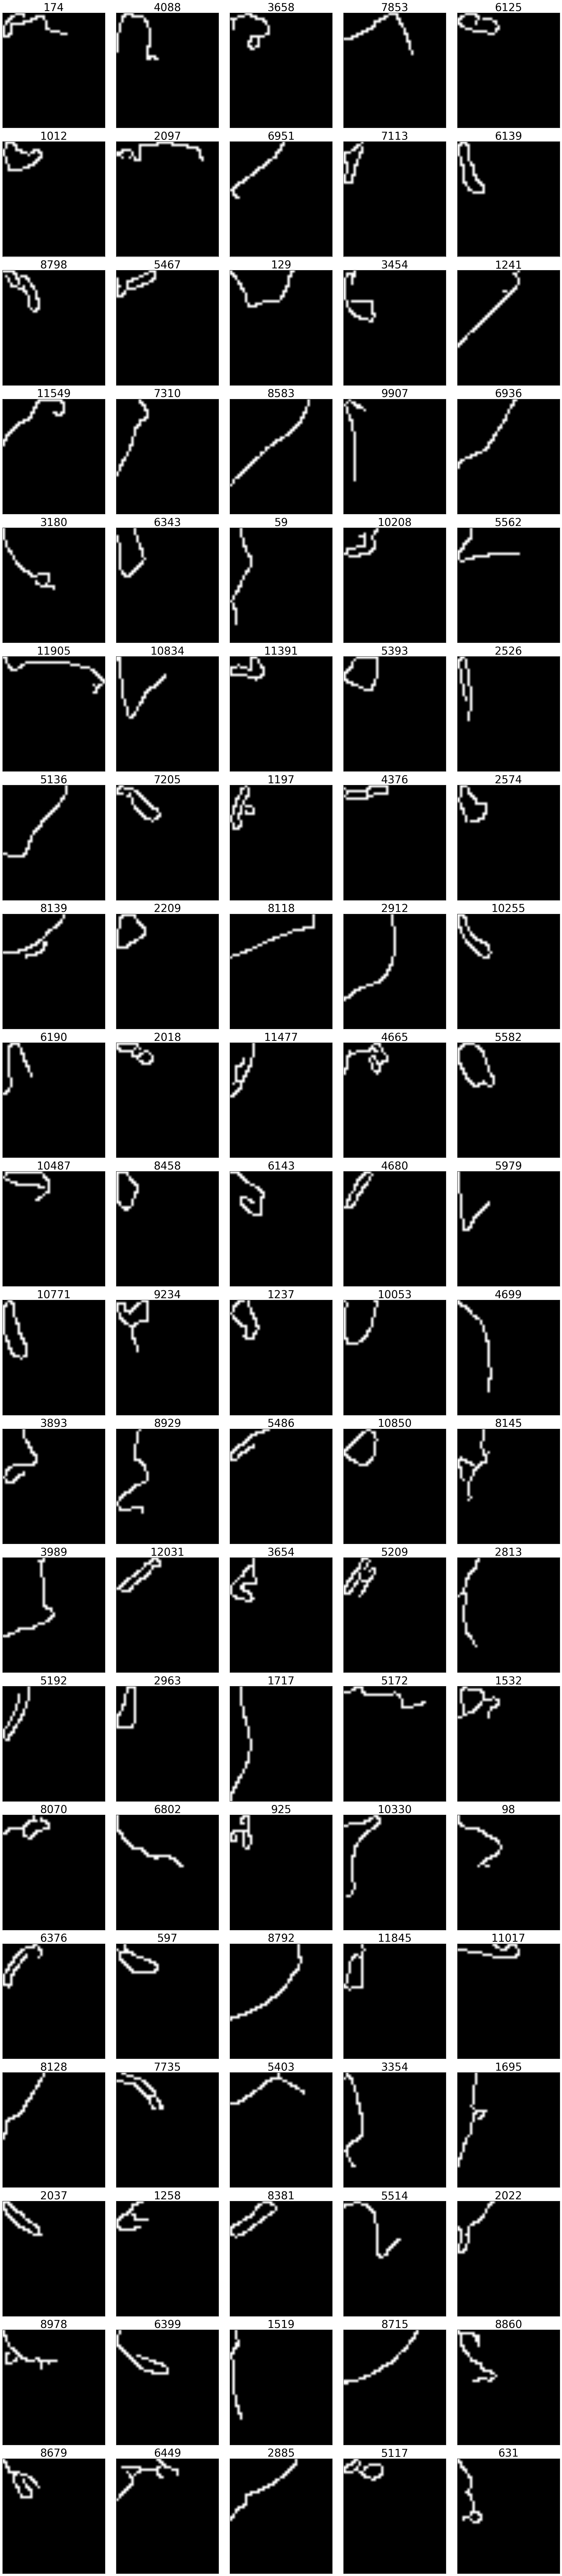

In [187]:
display_images_in_grids([conn_comps[i].image for i in indices], nc=5, titles=[str(i) for i in indices])

In [ ]:
[conn_comps[i].image for i in indices]